## Isolation Forest Anomaly Detection

In [14]:
import pandas as pd
df=pd.read_csv('healthcare.csv')
df.head()

,0,1
0,1.616671,1.944522
1,1.256461,1.609444
2,-2.343919,4.392961
3,1.195393,2.794485
4,-3.329586,5.303160


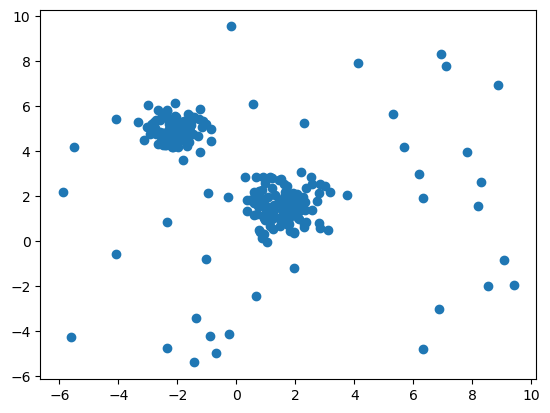

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [23]:

from sklearn.ensemble import IsolationForest

In [25]:

clf= IsolationForest(contamination=0.2)
clf.fit(df)
predictions=clf.predict(df)

In [26]:
predictions

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1

In [28]:
import numpy as np
index = np.where(predictions < 0)
index

(array([  4,  20,  24,  31,  45,  48,  49,  53,  55,  60,  61,  63,  67,
         72,  74,  78,  83,  85,  87,  92,  97, 104, 108, 114, 119, 126,
        130, 132, 133, 141, 151, 160, 167, 177, 179, 181, 182, 187, 197,
        199, 204, 209, 212, 217, 220, 221, 227, 242, 247, 248]),)

In [20]:
x=df.values

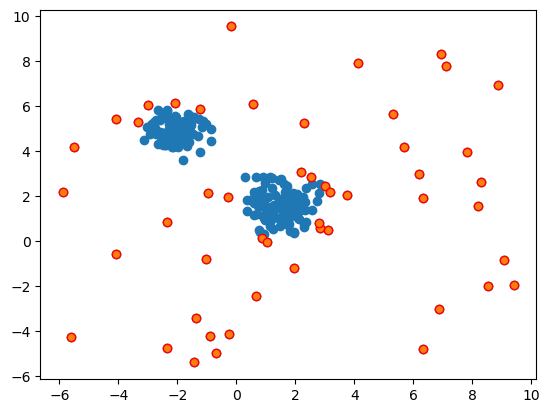

In [21]:
index = np.where(predictions < 0)
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(x[index,0], x[index,1], edgecolors="r")

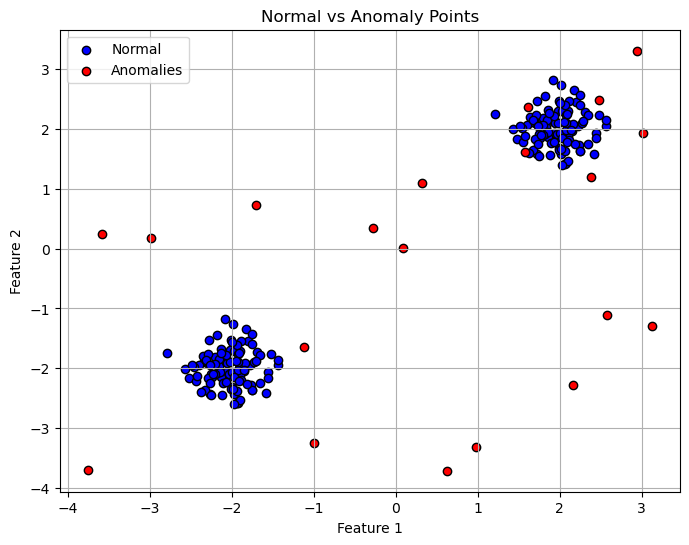

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
# Generate normal data
rng = np.random.RandomState(42)
X_normal = 0.3 * rng.randn(100, 2)
X_normal = np.r_[X_normal + 2, X_normal - 2]

# Add anomalies
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# Combine
X = np.r_[X_normal, X_outliers]

plt.figure(figsize=(8, 6))
plt.scatter(X_normal[:, 0], X_normal[:, 1], color='blue', label='Normal', edgecolors='k')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='red', label='Anomalies', edgecolors='k')
plt.title("Normal vs Anomaly Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [42]:
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(X)

# Predict
y_pred = clf.predict(X)         # -1 = anomaly, 1 = normal
scores = clf.decision_function(X)  # The anomaly score
print(scores)

[ 0.12061033  0.06968198  0.12866958  0.04090951  0.1105542   0.11502483
  0.07291047  0.05546944  0.10508385  0.0813068   0.05718968  0.10479581
  0.12059599  0.09700224  0.11937691  0.02556778  0.10805765  0.08492911
  0.07200931  0.08809226  0.10252343  0.12417746  0.0661475   0.0916318
  0.07929777  0.11873531  0.10741328  0.07227909  0.11582542  0.10294867
  0.12253431  0.07024845  0.07335739  0.10481509  0.11585535  0.07940269
  0.07751178 -0.03059224  0.12661614  0.06813459  0.12518305  0.05106589
  0.10805088  0.09365137  0.11443514  0.10406398  0.11823445  0.08909048
  0.12058506  0.1289294   0.07659043  0.1055523   0.12092204  0.03223756
  0.1257009   0.04224651 -0.02314407  0.12531601  0.1082157   0.07011859
  0.08796303  0.0436603   0.00219449  0.09781755  0.11993382  0.0698366
  0.09958256  0.0577971   0.11688018  0.08521991  0.09619149  0.07016652
  0.1098826   0.06820653  0.11282511  0.12090421  0.1189184   0.12077167
  0.02185838  0.08035846  0.08813513  0.07213123  0.0

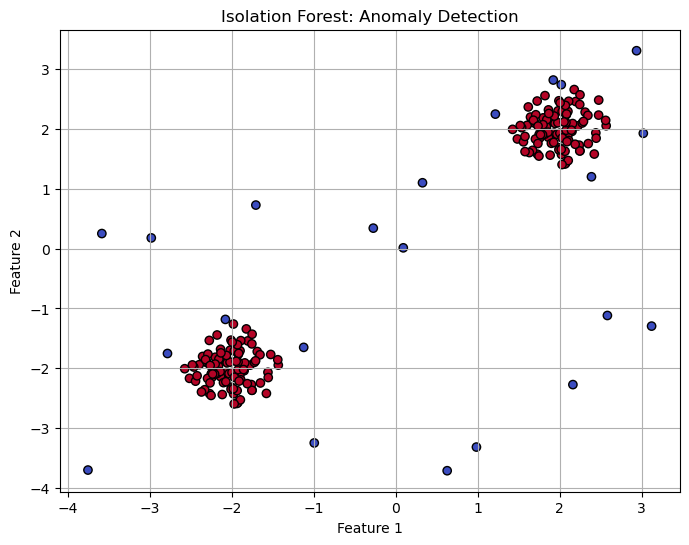

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title("Isolation Forest: Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

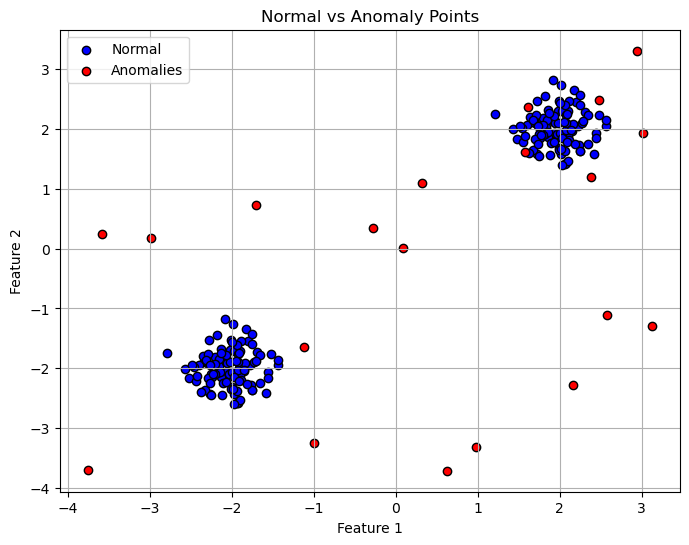

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate synthetic data
rng = np.random.RandomState(42)
X_normal = 0.3 * rng.randn(100, 2)
X_normal = np.r_[X_normal + 2, X_normal - 2]

X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_normal, X_outliers]

plt.figure(figsize=(8, 6))
plt.scatter(X_normal[:, 0], X_normal[:, 1], color='blue', label='Normal', edgecolors='k')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='red', label='Anomalies', edgecolors='k')
plt.title("Normal vs Anomaly Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

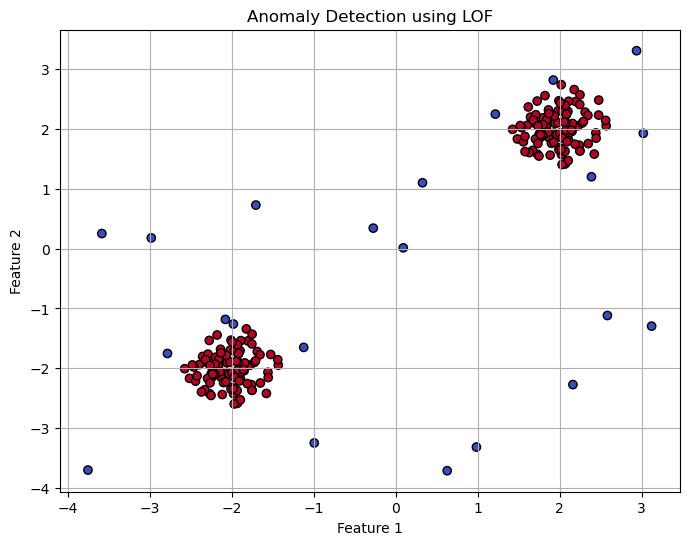

In [45]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)           # 1 = normal, -1 = anomaly
scores = -lof.negative_outlier_factor_  # Higher score = more abnormal

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title("Anomaly Detection using LOF")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

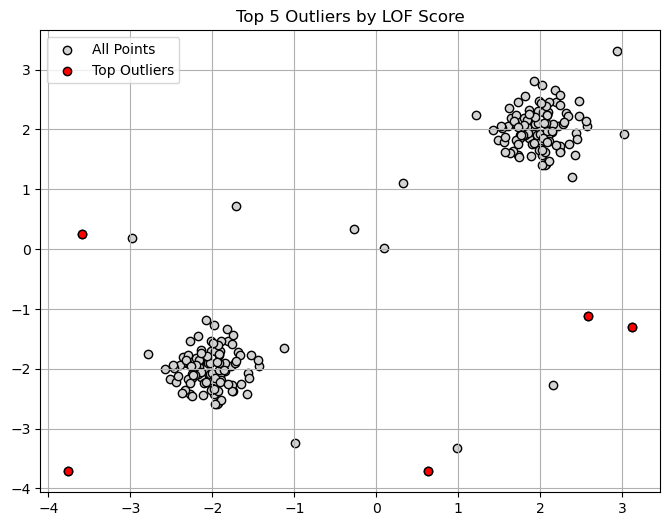